In [3]:
import pandas as pd
from nltk.corpus import stopwords
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from adjustText import adjust_text



In [4]:
corpus = np.array([
    'Os coronavírus são um grupo de vírus de genoma de RNA simples de sentido positivo (serve diretamente para a síntese proteica), conhecidos desde meados dos anos 1960. Pertencem à subfamília taxonómica Orthocoronavirinae da família Coronaviridae, da ordem Nidovirales. A maioria das pessoas se infecta com os coronavírus comuns ao longo da vida. Eles são uma causa comum de infecções respiratórias brandas a moderadas de curta duração. Entre os coronavírus encontra-se também o vírus causador da forma de pneumonia atípica grave conhecida por SARS.',
    'O Carnaval é um período de festas populares realizadas durante o dia e à noite. As comemorações ocorrem todos os anos, nos meses de fevereiro ou março, começando no sábado e estendendo-se até a Terça-feira de Carnaval. As celebrações carnavalescas terminam na Quarta-feira de Cinzas, dia que marca o início da Quaresma — período de 40 dias que segue até a Sexta-feira Santa, dois dias antes da Páscoa. As festas de Carnaval são adaptadas de acordo com a história e a cultura local. Em geral, as pessoas dançam, comem e bebem alegremente em festas, bailes de máscaras, bailes de fantasias, desfiles de blocos, escolas de samba, trios elétricos e até na própria rua.',
    'Os coronavírus (CoV) são uma grande família viral, conhecidos desde meados dos anos 1960, que causam infecções respiratórias em seres humanos e em animais. Geralmente, infecções por coronavírus causam doenças respiratórias leves a moderada, semelhantes a um resfriado comum. A maioria das pessoas se infecta com os coronavírus comuns ao longo da vida, sendo as crianças pequenas mais propensas a se infectarem. Os coronavírus comuns que infectam humanos são alpha coronavírus 229E e NL63 e beta coronavírus OC43, HKU1. Alguns coronavírus podem causar síndromes respiratórias graves, como a síndrome respiratória aguda grave que ficou conhecida pela sigla SARS da síndrome em inglês “Severe Acute Respiratory Syndrome”. SARS é causada pelo coronavírus associado à SARS (SARS-CoV), sendo os primeiros relatos na China em 2002. O SARS-CoV se disseminou rapidamente para mais de doze países na América do Norte, América do Sul, Europa e Asia, infectando mais de 8.000 pessoas e causando entorno de 800 mortes, antes da epidemia global de SARS ser controlada em 2003. Desde 2004, nenhum caso de SARS tem sido relatado mundialmente.',
    'O Carnaval começou a ser comemorado há muitos anos, em especial na região Sul da Europa, entre membros do Catolicismo, como festa pagã, ou seja, que contrariava os preceitos propagados pela religião. Estudos indicam que a palavra Carnaval tem como origem os termos latinos carne levare ou “para retirar a carne”. Esse significado tem relação com o período de Quaresma, no qual os católicos abrem mão de algumas comidas e bebidas e de parte de prazeres tidos como mundanos. Desse modo, segundo pesquisas, um dia antes da Quarta-feira de Cinzas, alguns católicos realizavam festas e aproveitavam para comer bastante carne, pois sabiam que, a partir do dia seguinte, não poderiam degustá-la até o final do período de Quaresma.Conforme a história do Carnaval, essa celebração pode estar relacionada a algumas festas de origem greco-romana dedicadas ao deus do vinho, Baco (ou Dionísio, para os gregos). Nos eventos, as pessoas costumavam embriagar-se, comer muito e entregar-se aos prazeres da carne.',
    'Os cientistas chineses posteriormente isolaram um novo coronavírus, o SARS-CoV-2, que foi encontrado ser pelo menos 70%% semelhante na sequência genética à SARS-CoV, e posteriormente mapeou e disponibilizou sua sequência genética. No entanto, o vírus não mostrou a mesma gravidade do SARS. As questões levantadas incluem se o vírus está circulando há mais tempo do que se pensava anteriormente, se Wuhan é realmente o centro do surto ou simplesmente o local em que foi identificado pela primeira vez com a vigilância e os testes em andamento, e se poderia haver uma possibilidade de que Wuhan seja um evento de super dispersão. Em 28 de janeiro de 2020, o Ministério da Saúde do Brasil confirmou três casos suspeitos de coronavírus, localizados em Belo Horizonte, Porto Alegre e Curitiba. O Ministério não deu detalhes sobre os pacientes de Porto Alegre e Curitiba e tampouco informou sobre o estado de saúde de ambos. Entretanto, sabe-se que a paciente de Minas Gerais apresentou sintomas compatíveis com o protocolo de prevenção, sendo que ela esteve na cidade de Wuhan, o epicentro do surto do vírus. A paciente encontra-se estável e em isolamento.',
    'O Carnaval é uma celebração de data móvel obrigatoriamente comemorada numa terça-feira. O Carnaval 2020 cai no dia 25 de fevereiro. Apesar de tradicionalmente esse ser um dia de folga, o Carnaval não é um feriado nacional. No Rio de Janeiro, sim, é feriado estadual, conforme Lei nº 5246, de 14 de maio de 2008. A festa de Carnaval, dependendo da região, dura de três a sete dias, e sua data varia a cada ano, uma vez que ocorre sempre 47 dias antes da Páscoa.',
    'Carnaval é um festival do cristianismo ocidental que ocorre antes da estação litúrgica da Quaresma. Os principais eventos ocorrem tipicamente durante fevereiro ou início de março, durante o período historicamente conhecido como Tempo da Septuagésima (ou pré-quaresma). O Carnaval normalmente envolve uma festa pública e/ou desfile combinando alguns elementos circenses, máscaras e uma festa de rua pública. As pessoas usam trajes durante muitas dessas celebrações, permitindo-lhes perder a sua individualidade cotidiana e experimentar um sentido elevado de unidade social. O consumo excessivo de álcool, de carne e outros alimentos proscritos durante a Quaresma é extremamente comum. Outras características comuns do carnaval incluem batalhas simuladas, como lutas de alimentos; sátira social e zombaria das autoridades e uma inversão geral das regras e normas do dia-a-dia.',
    'O termo Carnaval é tradicionalmente usado em áreas com uma grande presença católica. No entanto, as Filipinas, um país predominantemente católico romano, não comemora mais o Carnaval desde a dissolução da festa de Manila em 1939, o último carnaval no país.',
    'Carnaval No Parque 2020',
    'Pessoas com doenças cardiovasculares e idosos são mais propensos a desenvolver complicações da Covid-19, a doença provocada pelo novo coronavírus.',
    'Os autores relatam que engravidar não é um fator de risco para contrair a dengue. Por outro lado, essa fase da vida demanda cuidados específicos em caso de contato com o vírus.',
    'O novo coronavírus (que agora recebeu o nome de covid-19) acabou de ser descoberto e já criaram dezenas de fake news sobre ele. De uma origem em laboratório orquestrada pelo empresário Bill Gates para lucrar com vacinas a estratégias simples e milagrosas para tratar e evitar a infecção, sobram informações inverídicas'
])

corpus



array(['Os coronavírus são um grupo de vírus de genoma de RNA simples de sentido positivo (serve diretamente para a síntese proteica), conhecidos desde meados dos anos 1960. Pertencem à subfamília taxonómica Orthocoronavirinae da família Coronaviridae, da ordem Nidovirales. A maioria das pessoas se infecta com os coronavírus comuns ao longo da vida. Eles são uma causa comum de infecções respiratórias brandas a moderadas de curta duração. Entre os coronavírus encontra-se também o vírus causador da forma de pneumonia atípica grave conhecida por SARS.',
       'O Carnaval é um período de festas populares realizadas durante o dia e à noite. As comemorações ocorrem todos os anos, nos meses de fevereiro ou março, começando no sábado e estendendo-se até a Terça-feira de Carnaval. As celebrações carnavalescas terminam na Quarta-feira de Cinzas, dia que marca o início da Quaresma — período de 40 dias que segue até a Sexta-feira Santa, dois dias antes da Páscoa. As festas de Carnaval são adaptad

In [5]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(corpus)
X.shape



(12, 461)

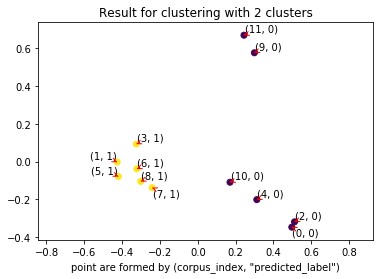

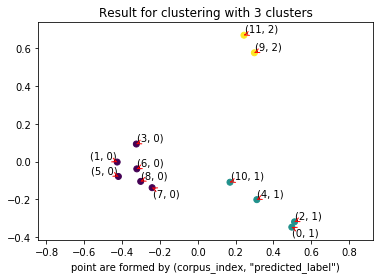

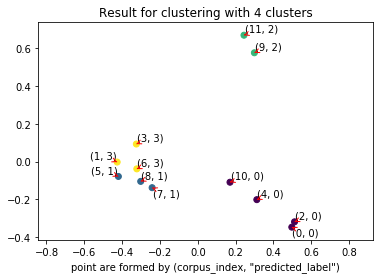

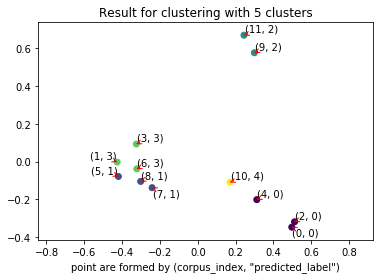

In [15]:
pca = PCA()

for k in [2,3,4,5]:
    model = AgglomerativeClustering(n_clusters=k).fit(X.toarray())
    scatter_plot_points = pca.fit_transform(X.toarray())

    xs = [o[0] for o in scatter_plot_points]
    ys = [o[1] for o in scatter_plot_points]
    fig, ax = plt.subplots()

    ax.set_title(f'Result for clustering with {k} clusters')
    plt.xlabel(f'point are formed by (corpus_index, "predicted_label")'])
    ax.axis('equal')
    ax.scatter(xs, ys, c=model.labels_)

    texts = [plt.text(xs[i], ys[i], f'{i, model.labels_[i]}') for i in range(len(xs))]
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))


